In [ ]:
#primry finding: Car related crime Increases at night

In [1]:
#first:- read and summary the data to familiarize with attributes
seatlle <- read.csv(file = "./seattle_incidents_summer_2014.csv")
head(seatlle)
summary(seatlle)

RMS.CDW.ID,General.Offense.Number,Offense.Code,Offense.Code.Extension,Offense.Type,Summary.Offense.Code,Summarized.Offense.Description,Date.Reported,Occurred.Date.or.Date.Range.Start,Occurred.Date.Range.End,Hundred.Block.Location,District.Sector,Zone.Beat,Census.Tract.2000,Longitude,Latitude,Location,Month,Year
483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.301,-122.3647,47.68252,"(47.68252427, -122.364671996)",6,2014
481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.100,-122.2771,47.63990,"(47.639900761, -122.277080248)",6,2014
481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,,81XX BLOCK OF 11 AV SW,F,F3,11300.501,-122.3493,47.52923,"(47.529232299, -122.349312181)",8,2014
481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,,6XX BLOCK OF PINE ST,M,M2,8200.100,-122.3348,47.61237,"(47.612368448, -122.334817763)",6,2014
478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.202,-122.3294,47.68596,"(47.685959879, -122.329378505)",6,2014
480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.401,-122.2875,47.55785,"(47.557854802, -122.287477902)",6,2014


   RMS.CDW.ID      General.Offense.Number  Offense.Code  
 Min.   :  12470   Min.   :2.015e+07      2305   : 6230  
 1st Qu.:  47246   1st Qu.:2.014e+09      X      : 3305  
 Median : 999859   Median :2.014e+09      2399   : 3034  
 Mean   : 578650   Mean   :2.020e+09      2404   : 2871  
 3rd Qu.:1030117   3rd Qu.:2.014e+09      2903   : 1638  
 Max.   :1125252   Max.   :2.014e+11      1313   : 1368  
                                          (Other):14333  
 Offense.Code.Extension                         Offense.Type  
 Min.   : 0.0           THEFT-CARPROWL                : 6230  
 1st Qu.: 0.0           VEH-THEFT-AUTO                : 2588  
 Median : 0.0           THEFT-OTH                     : 2221  
 Mean   : 4.2           PROPERTY DAMAGE-NON RESIDENTIA: 1638  
 3rd Qu.: 1.0           ASSLT-NONAGG                  : 1320  
 Max.   :98.0           DISTURBANCE-OTH               : 1295  
                        (Other)                       :17487  
 Summary.Offense.Code Summarized

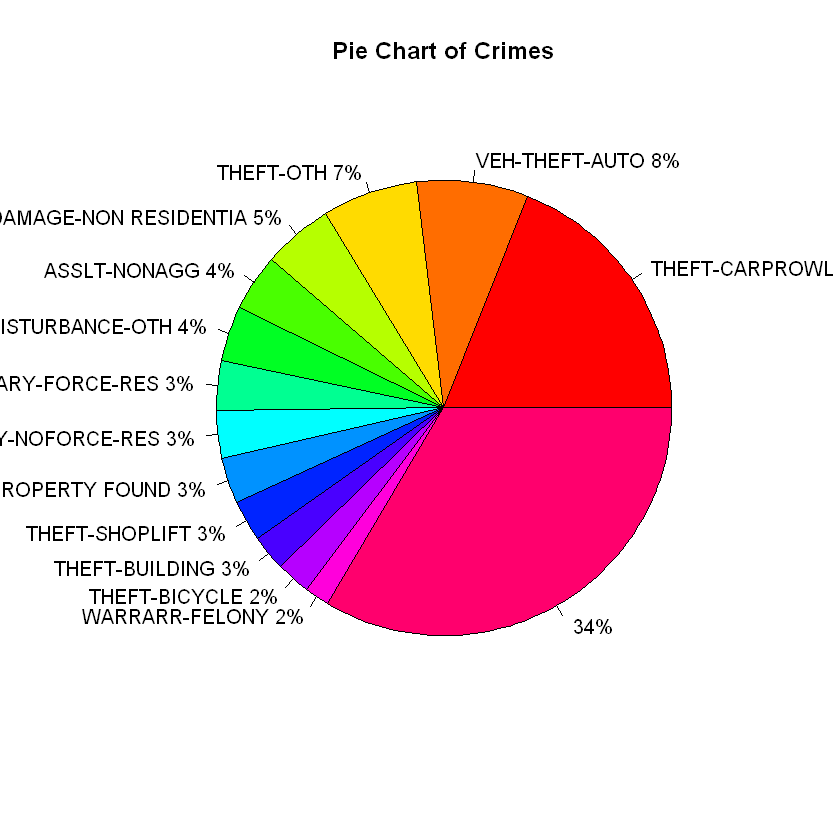

In [3]:
# second we will view the persentage of crimes through
# plotting a Pie Chart with Percentages for crimes with > 530 incident 
# and combine all < 530 in others cluster for visualizing the most commen
# crime types 
others <- sum(subset(summary(seatlle$Offense.Type),
                     summary(seatlle$Offense.Type)<=530))
slices <- c(subset(summary(seatlle$Offense.Type),
                   summary(seatlle$Offense.Type)>530),others)
lbls <- names(slices)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
    main="Pie Chart of Crimes")

In [ ]:
#conclusion: car related crimes is the most commen crimes with
# 26% of all crime types 


In [4]:
# function: extract from timestamp field the hour time
# input:    factor level
# output:   numeric
fun1 <- function(x) {
  if(substr(x,21,22) == 'AM'){
    as.numeric(substr(x,12,13))
  }else{
    as.numeric(substr(x,12,13)) + 12
  }
}

In [ ]:
##################################################################

In [ ]:
# third: we plot timeseries of crime incidents by time of day,
# illustrating that crime increases at night

In [5]:
# create new col in dataset represent the time the crime start 
# in hour 24-format
seatlle$clock <- mapply(fun1, 
                        sapply(seatlle$Occurred.Date.or.Date.Range.Start,
                               as.character))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


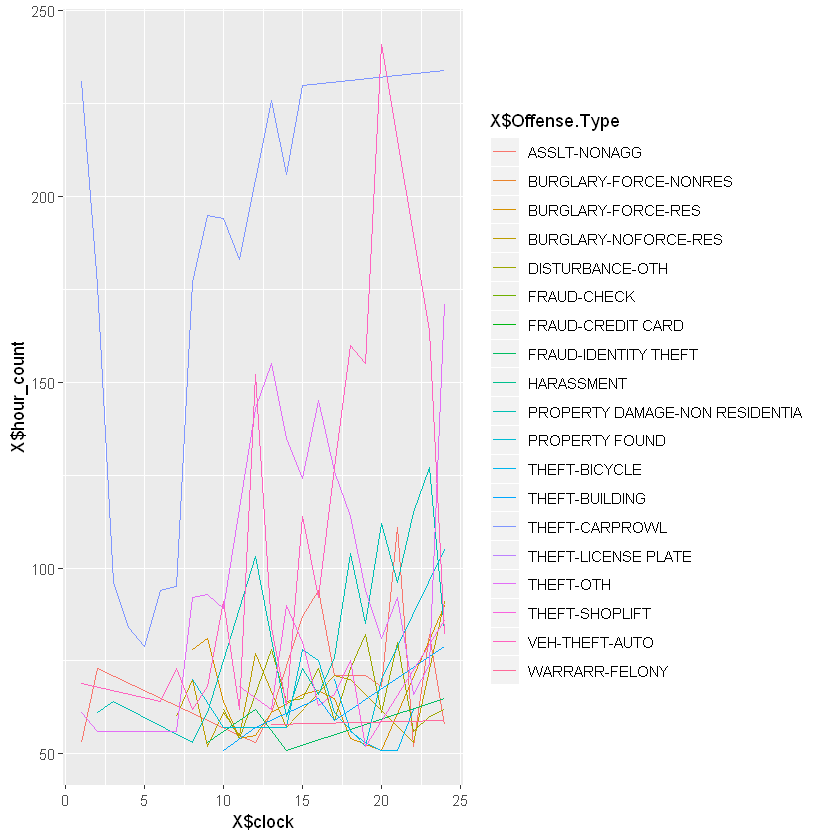

In [6]:
# time vs crime_rate  represent the rate of each crime per  each hour of 
# the day
# ** limit the count to 250 to better represent the data on graph
library(dplyr)
library(ggplot2)
X <-  seatlle %>%
  group_by(Offense.Type,clock) %>%
  summarise(hour_count = n())
X <- subset(X,(X$hour_count>50 & X$hour_count<250))
temp <- ggplot(X, aes(x=X$clock, y=X$hour_count, 
                      group=X$Offense.Type, color=X$Offense.Type))+
        geom_line()
print(temp)

In [ ]:
#From the figure, we see that most car related crimes
#occur between 5 pm and 3 am."

In [ ]:
##################################################################

In [ ]:
# now we will make a visualization histogram of all crimes
# during peak hour to concluide tha crimes rate increase after daylight

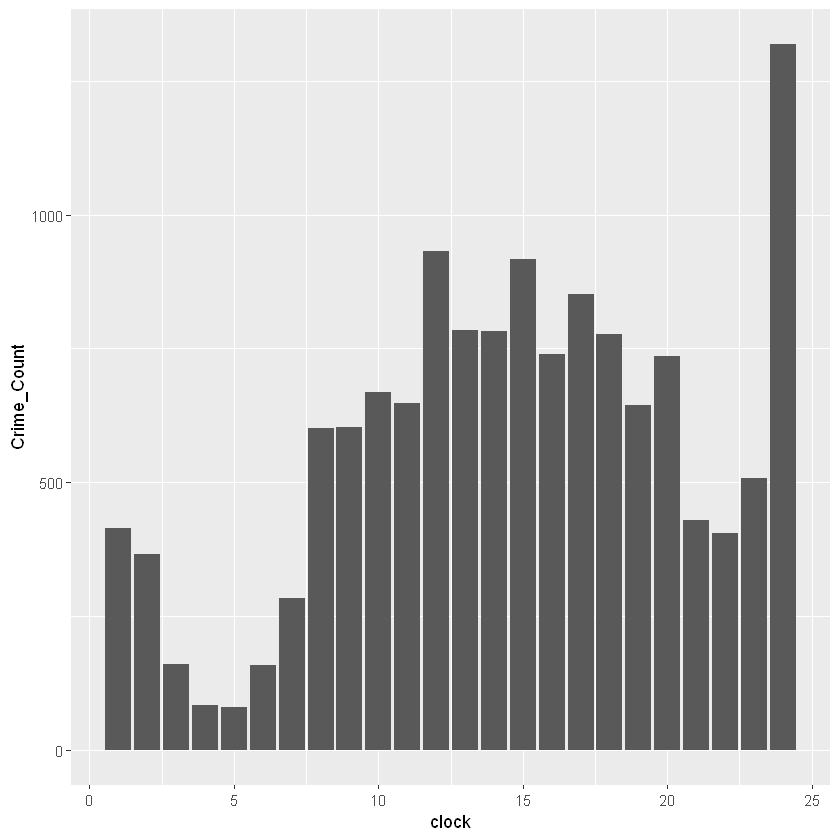

In [7]:
# time vs crime_no histogram represent the rate of each crime per 
# each hour of the day
Y <-  X %>%
  group_by(clock) %>%
  summarise(Crime_Count = sum(hour_count))


print(ggplot(Y, aes(x=clock, y=Crime_Count)) + 
        geom_bar(stat = "identity"))


In [ ]:
################################################################

In [ ]:
# last we sort crime rate per district which 
# we see that crime distrbuition across district has no great difference

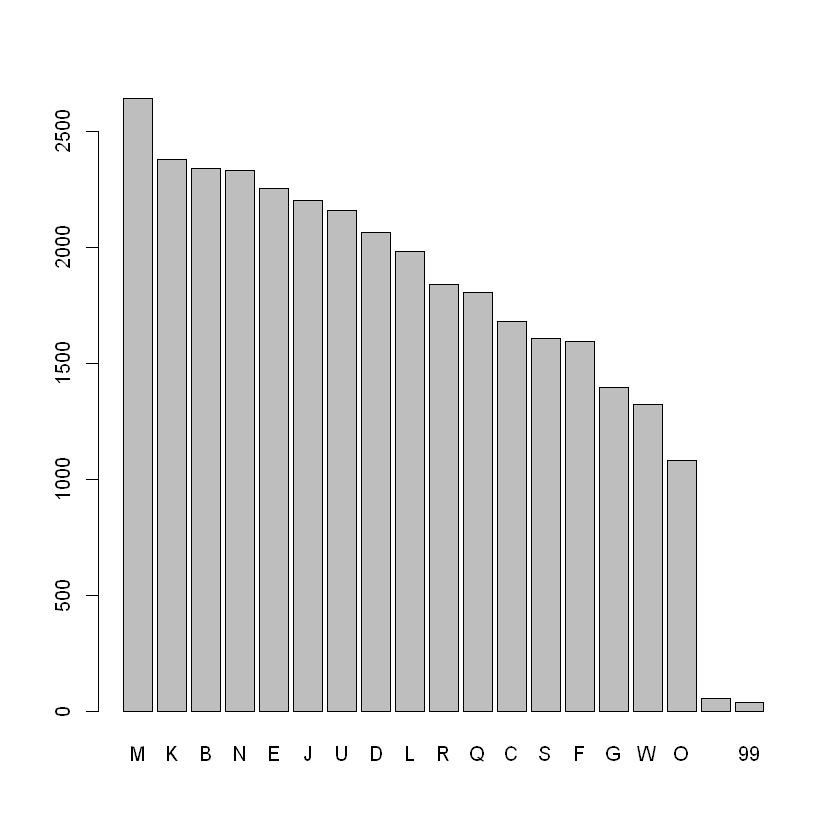

In [8]:
# sorted barplot for crime rate per district 
asdf <- summary(seatlle$District.Sector)
asdf1 <- sort(asdf,decreasing = TRUE)
barplot(asdf1)
